In [50]:
#importing the libraries
import pandas as pd
import pyreadstat
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#importing both the data
df_health, meta_health = pyreadstat.read_sav(r"C:\Users\0196A6744\Desktop\Data_science\Omdena\Health\ch22o_EN_1.0p (2)\ch22o_EN_1.0p.sav")
df_social, meta_social = pyreadstat.read_sav(r"C:\Users\0196A6744\Desktop\Data_science\Omdena\Social Integration and Leisure\cs22o_EN_1.0p\cs22o_EN_1.0p.sav")

**Handling the meta data**

In [33]:
#creating a dictionary of meta data
question_dic_health = dict(zip(meta_health.column_names,meta_health.column_labels))
question_dic_social = dict(zip( meta_social.column_names, meta_social.column_labels))
question_dic = question_dic_health | question_dic_social

In [34]:
question_dic

{'nomem_encr': 'Number of household member encrypted',
 'ch22o_m': 'Year and month of the field work period',
 'ch22o001': 'preloaded variable: gender',
 'ch22o002': 'preloaded variable: age',
 'ch22o003': 'preloaded variable: paid job or not',
 'ch22o004': 'How would you describe your health, generally speaking?',
 'ch22o005': 'Is your health poorer or better, compared to last year?',
 'ch22o006': 'How would you rate your chance of living to be 75 years old or older?',
 'ch22o007': 'How would you rate your chance of living to be 80 years old or older?',
 'ch22o008': 'How would you rate your chance of living to be 85 years old or older?',
 'ch22o009': 'How would you rate your chance of living to be 90 years old or older?',
 'ch22o010': 'How would you rate your chance of living to be 95 years old or older?',
 'ch22o011': 'I felt very anxious',
 'ch22o012': 'I felt so down that nothing could cheer me up',
 'ch22o013': 'I felt calm and peaceful',
 'ch22o014': 'I felt depressed and gloomy'

In [79]:
df['ch22o043'].value_counts()

1.0    5168
5.0     184
2.0     153
3.0      26
4.0      17
Name: ch22o043, dtype: int64

In [37]:
#get the question descrption from id
qid = input("Enter the question number: ")
print(f"corresponding question is: {question_dic[qid]}")

Enter the question number: cs22o014
corresponding question is: a trade union, donated money


**Handling the exact data**

In [38]:
#inner join on both the tables
#creating a dataframe joining this 2 dataframe based on nomem_encr column
df = pd.merge(df_health, df_social, on='nomem_encr', how='inner')

In [39]:
# check the shape of data
print(f"shape of health data: {df_health.shape}")
print(f"shape of social data: {df_social.shape}")
print(f"shape of combined data:{df.shape}")

shape of health data: (5832, 209)
shape of social data: (5884, 437)
shape of combined data:(5556, 645)


In [40]:
missing_data = pd.DataFrame(df.isnull().sum(),columns=['missing_count'])
missing_data.head()

,missing_count
nomem_encr,0
ch22o_m,0
ch22o001,2
ch22o002,2
ch22o003,2


In [47]:
missing_data['missing_percentage'] = missing_data.missing_count
missing_data.missing_percentage = missing_data.missing_percentage.apply(lambda count:round((count/len(df))*100))

In [60]:
#missing_data.reset_index(inplace=True)
#missing_data.rename(columns={'index':'question'},inplace=True)
missing_data.drop('level_0',axis=1, inplace=True)
missing_data.head()


,question,missing_count,missing_percentage
0,nomem_encr,0,0
1,ch22o_m,0,0
2,ch22o001,2,0
3,ch22o002,2,0
4,ch22o003,2,0


In [61]:
#saving the data for future reference
missing_data.to_csv("liss_missing_data.csv")

Text(0.5, 0, 'Number of missing values')

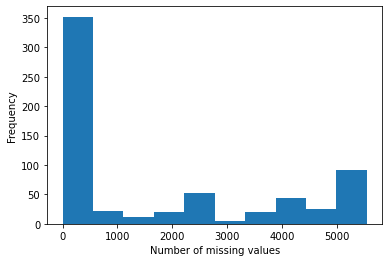

In [73]:
#Histogram of missing data
missing_data.missing_count.plot.hist()
plt.xlabel("Number of missing values")

Text(0.5, 0, 'percentage of missing values')

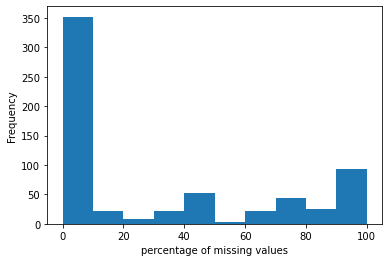

In [72]:
#Histogram of missing data percentage
missing_data.missing_percentage.plot.hist()
plt.xlabel("percentage of missing values")

Greater than 60%    182
upto 10%             68
40-60%               56
20-40%               32
10-20%               19
Name: missing_percentage, dtype: int64


<AxesSubplot:>

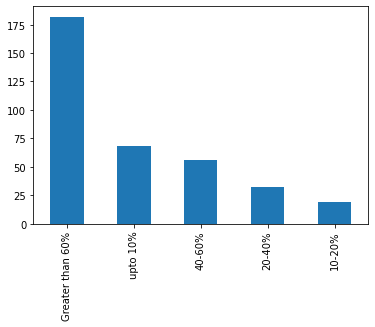

In [71]:
#Discreatization of the number of columns
missing_summary = pd.cut(missing_data.missing_percentage, bins = [min(missing_data.missing_percentage),10,20, 40,60, max(missing_data.missing_percentage)],
                   labels = ["upto 10%", "10-20%", "20-40%","40-60%","Greater than 60%"])
print(missing_summary.value_counts())
missing_summary.value_counts().plot.bar()